In [1]:
import pandas as pd
import numpy as np

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

import os
%config IPCompleter.greedy = True
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
plt.figure(figsize=(9,9))
plt.rcParams["figure.figsize"] = [9, 9]

<Figure size 648x648 with 0 Axes>

# Глава 2. Теория. Полный проект МО

1. Выяснение общей картины
2. Получение данных
3. Обнаружение и визуализация данных
4. Подготовка данных для алгоритмов МО
5. Выбор модели и ее обучения
6. Точная настройка модели
7. Представление своего решения
8. Запуск, наблюдение и сопровождение системы

## Housing

In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Таблица представляет данные по округам Калифорнии**
- долгота
- широта
- средний возраст домов округа
- всего комнат в домах округа
- всего спален в домах округа
- количество проживающих в округе
- количество домов в округе
- средний доход в округе
- средняя стоимость дома в округе
- нахождение относительно океана

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


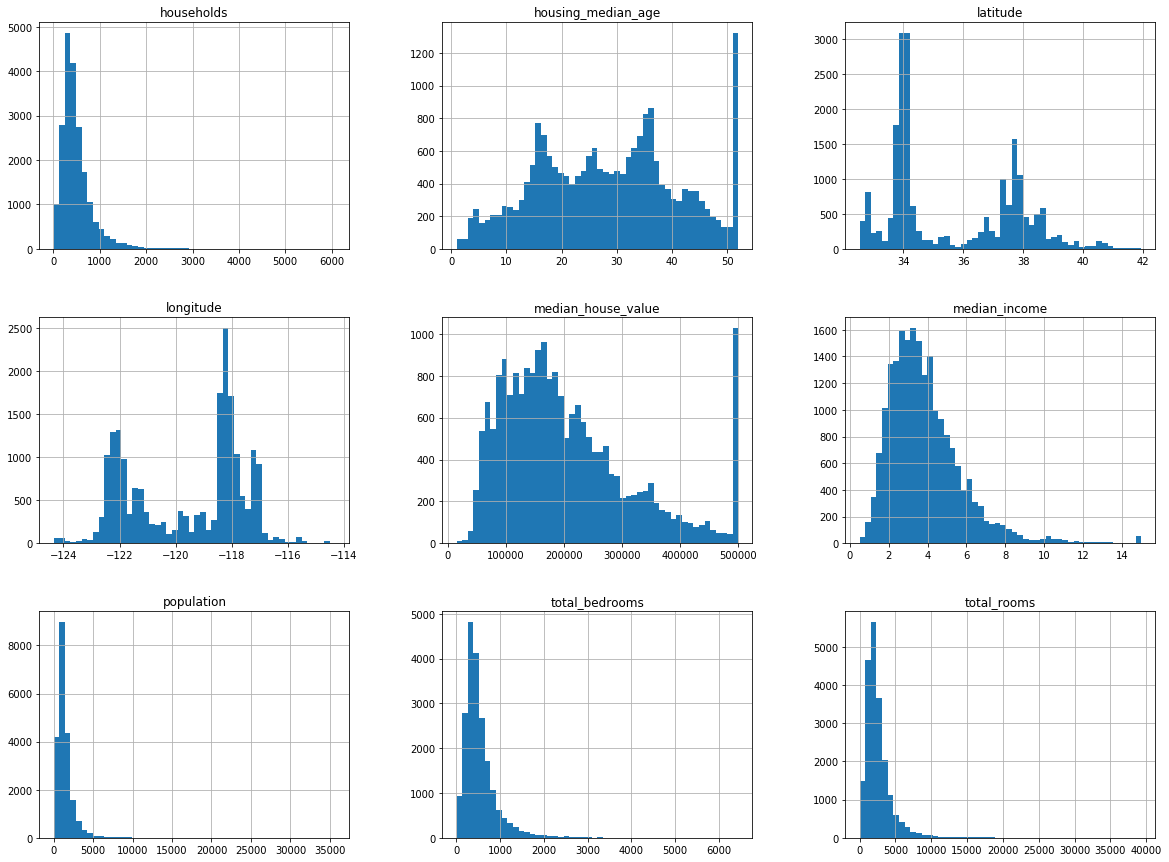

In [10]:
housing.hist(bins=50, figsize=(20,15));

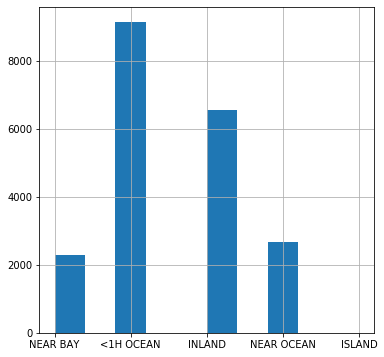

In [11]:
housing.ocean_proximity.hist(figsize=(6,6));

In [12]:
housing.corr().median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [13]:
housing['income_cat'] = np.ceil(housing.median_income / 1.5)

In [14]:
housing['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [15]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [16]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
# дает более качественный сплит относительно одной более важной (на выбор) колонки
sss = StratifiedShuffleSplit(random_state=42, n_splits=1, test_size=0.2)

In [19]:
for train_index, test_index in sss.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

In [21]:
housing = strat_train_set.copy()

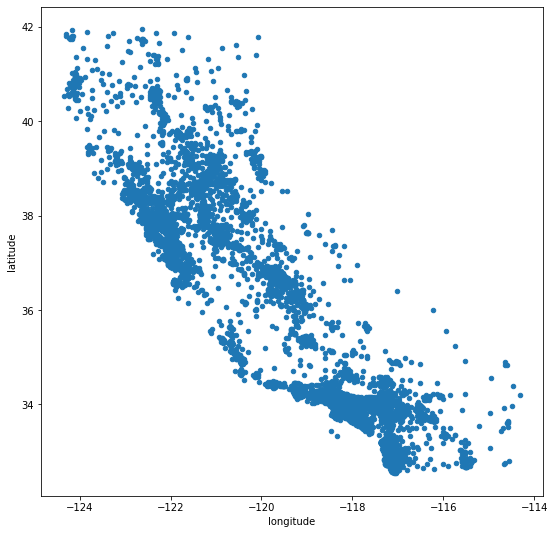

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude');

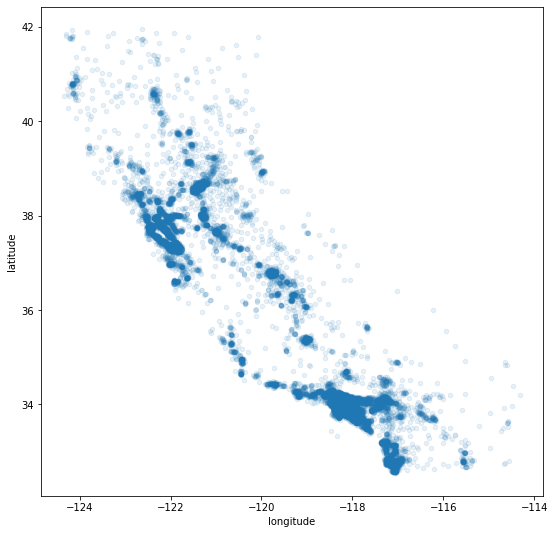

In [23]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

Saving figure graphs\[2]housing_prices_scatterplot


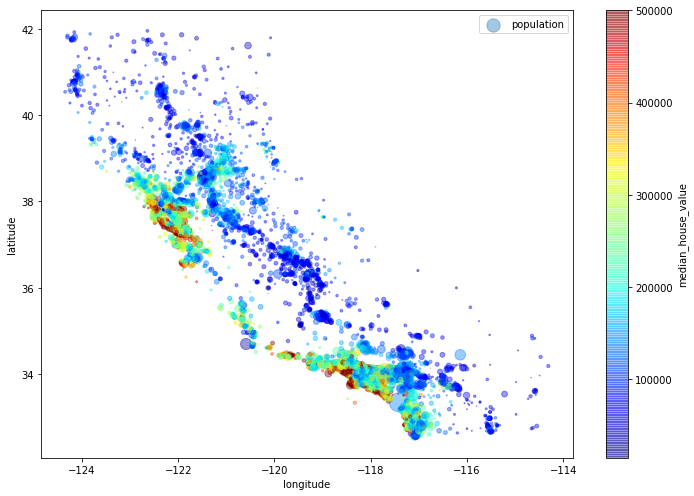

In [24]:
# параметр s отвечает за площадь кругов (чем больше, тем больше население округа); 
# параметр c отвечает за фильтр по цвету относительно средней цены домов в округе
# cmap - окраска, colorbar - легенда раскраски
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population'] /100, 
             c='median_house_value', cmap='jet', colorbar='True', figsize=(10,7), sharex=False, label='population'
)
plt.legend();
save_fig("graphs\[2]housing_prices_scatterplot");

In [25]:
housing.corr().median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [26]:
from pandas.plotting import scatter_matrix

Saving figure graphs\[2]scatter_matrix_plot


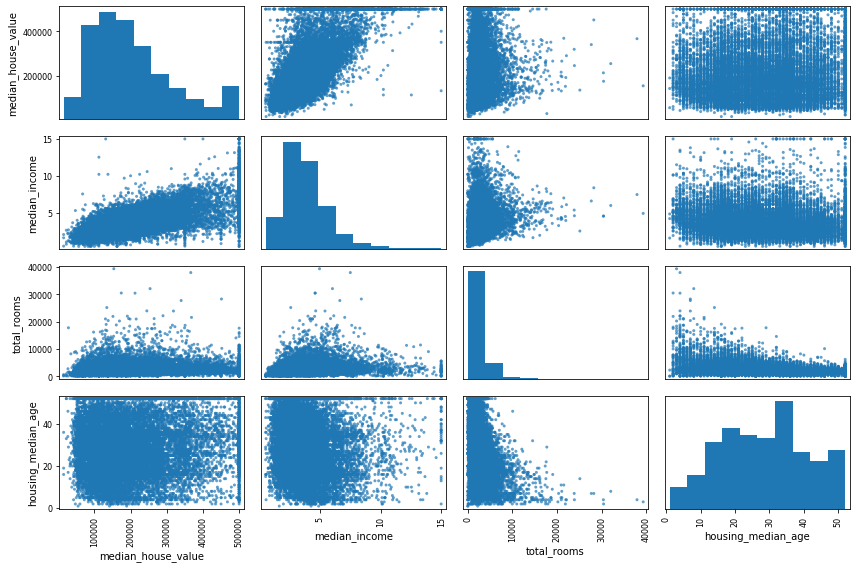

In [27]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.7);
save_fig('graphs\[2]scatter_matrix_plot')

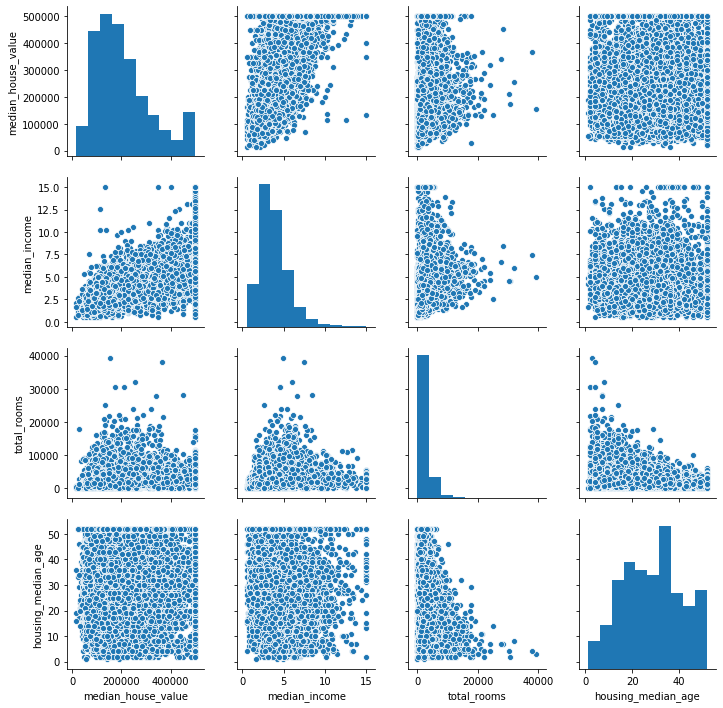

In [28]:
sns.pairplot(housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']]);

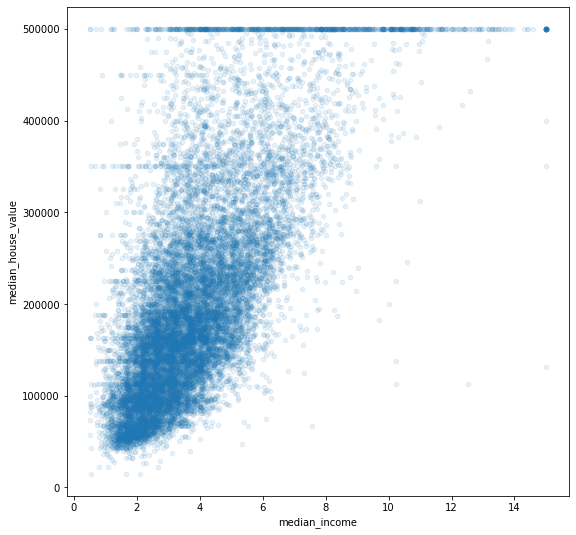

In [29]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);

In [30]:
housing.median_house_value.value_counts().head(10)

500001.0    786
137500.0    102
162500.0     91
112500.0     80
187500.0     76
225000.0     70
350000.0     65
87500.0      59
150000.0     58
175000.0     52
Name: median_house_value, dtype: int64

Saving figure graphs\[2]california_housing_prices_plot


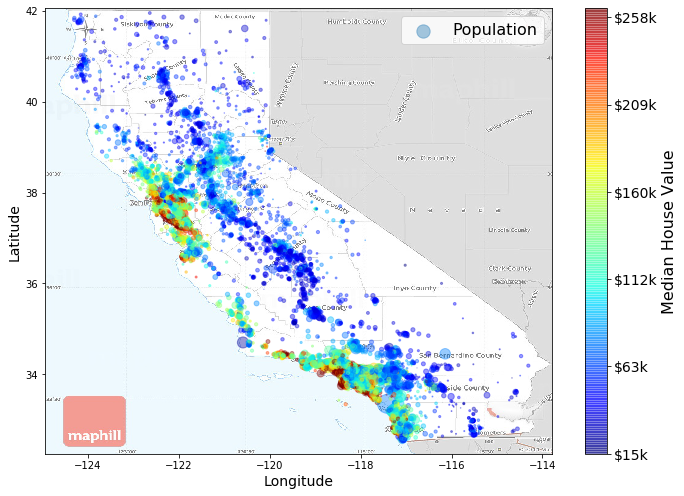

In [31]:
import matplotlib.image as mpimg
california_img=mpimg.imread('images\california.jpg')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.95, -113.80, 32.25, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("graphs\[2]california_housing_prices_plot")
plt.show()

In [32]:
print('='* 248)

In [33]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [34]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [35]:
print('='* 248)

In [36]:
strat_train_set.total_bedrooms.fillna(strat_train_set.total_bedrooms.median(), inplace=True)
strat_test_set.total_bedrooms.fillna(strat_test_set.total_bedrooms.median(), inplace=True)

In [37]:
dummied_train_set = pd.get_dummies(strat_train_set.ocean_proximity).reset_index()
dummied_test_set = pd.get_dummies(strat_test_set.ocean_proximity).reset_index()

In [38]:
strat_train_set.drop('ocean_proximity', axis=1, inplace=True)
strat_test_set.drop('ocean_proximity', axis=1, inplace=True)

In [39]:
strat_train_set['rooms_per_household'] = strat_train_set['total_rooms'] / strat_train_set['households']
strat_train_set['bedrooms_per_room'] = strat_train_set['total_bedrooms'] / strat_train_set['total_rooms']
strat_train_set['population_per_household'] = housing['population'] / strat_train_set['households']

strat_test_set['rooms_per_household'] = strat_test_set['total_rooms'] / strat_test_set['households']
strat_test_set['bedrooms_per_room'] = strat_test_set['total_bedrooms'] / strat_test_set['total_rooms']
strat_test_set['population_per_household'] = strat_test_set['population'] / strat_test_set['households']

In [40]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,6.715625,0.156972,2.275000
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,6.388633,0.157490,2.563748
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,4.973744,0.212532,2.408676
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,5.546584,0.171333,3.161491
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,5.877483,0.176901,3.533113


In [41]:
y_train = strat_train_set['median_house_value']
y_valid = strat_test_set['median_house_value']

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

strat_train_set = sc.fit_transform(strat_train_set)
strat_test_set = sc.fit_transform(strat_test_set)

strat_train_set = pd.DataFrame(strat_train_set, columns = housing.drop('ocean_proximity', axis=1).columns).reset_index()
strat_test_set = pd.DataFrame(strat_test_set, columns = housing.drop('ocean_proximity', axis=1).columns).reset_index()

In [43]:
strat_train_set.drop('index', axis=1, inplace=True)
strat_test_set.drop('index', axis=1,inplace=True)
dummied_train_set.drop('index', axis=1,inplace=True)
dummied_test_set.drop('index', axis=1,inplace=True)

In [44]:
strat_train_set = strat_train_set.join(dummied_train_set, how='left')
strat_test_set = strat_test_set.join(dummied_test_set, how='left')

In [45]:
X_train = strat_train_set.drop('median_house_value', axis=1)
X_valid = strat_test_set.drop('median_house_value', axis=1)

In [46]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-4.272678e-15,2.275755e-15,-2.700521e-16,8.606884e-17,1.181562e-16,-4.347735e-17,9.614940e-18,-2.225960e-16,7.258944e-17,-5.100205e-17,-1.592516e-17,0.440649,0.318738,0.000121,0.111858,0.128634
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,0.496480,0.466001,0.011005,0.315201,0.334804
min,-2.384937e+00,-1.449760e+00,-2.199168e+00,-1.223689e+00,-1.294944e+00,-1.269921e+00,-1.317668e+00,-1.772116e+00,-1.650273e+00,-2.704542e+00,-2.075303e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.111083e+00,-7.949406e-01,-8.472092e-01,-5.516890e-01,-5.793145e-01,-5.698825e-01,-5.803963e-01,-6.870806e-01,-3.822514e-01,-5.914834e-01,-5.741738e-02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.324379e-01,-6.452675e-01,2.758786e-02,-2.353301e-01,-2.458409e-01,-2.292746e-01,-2.370459e-01,-1.756999e-01,-7.966522e-02,-1.628895e-01,-2.406537e-02,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.822131e-01,9.730728e-01,6.638039e-01,2.423650e-01,2.604547e-01,2.684162e-01,2.793106e-01,4.561338e-01,2.358755e-01,4.044268e-01,1.596812e-02,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.630550e+00,2.951564e+00,1.856709e+00,1.716114e+01,1.381603e+01,3.071047e+01,1.293803e+01,5.839969e+00,5.225419e+01,3.975916e+01,1.070603e+02,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
print('='* 248)

In [48]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(lin_reg.predict(X_valid), y_valid))

66973.71087993948

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [51]:
np.sqrt(mean_squared_error(dtr.predict(X_valid), y_valid))

108416.28309518877

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print('Суммы оценок', scores)
    print('Среднее:', scores.mean())
    print('Стандартное отклонение:', scores.std())

display_scores(tree_rmse_scores)

Суммы оценок [68927.85095887 67060.10845357 71765.78881844 69052.7789228
 71703.91284517 75076.99299686 71001.45463171 69948.09189294
 76036.38283506 71377.17700029]
Среднее: 71195.05393557178
Стандартное отклонение: 2598.951358316411


In [53]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_reg_rmse_scores)

Суммы оценок [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Среднее: 69052.46136345084
Стандартное отклонение: 2731.6740017983493


In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [55]:
np.sqrt(mean_squared_error(rfr.predict(X_valid), y_valid))

82412.55649606972

In [56]:
rfr_scores = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)
display_scores(rfr_rmse_scores)

Суммы оценок [51751.96549059 49035.48779631 53717.39393155 54737.65936045
 50937.9637915  56660.31768705 51875.901699   49991.39250557
 55657.84853462 53343.258548  ]
Среднее: 52770.91893446418
Стандартное отклонение: 2354.3895199152566


In [57]:
print('='* 248)

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rfr, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
      

In [59]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [60]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65080.47974202233 {'max_features': 2, 'n_estimators': 3}
55697.61088947052 {'max_features': 2, 'n_estimators': 10}
53292.78012622252 {'max_features': 2, 'n_estimators': 30}
61400.53837670877 {'max_features': 4, 'n_estimators': 3}
52616.58425948814 {'max_features': 4, 'n_estimators': 10}
50341.58570852818 {'max_features': 4, 'n_estimators': 30}
58075.51871302505 {'max_features': 6, 'n_estimators': 3}
51720.247884485274 {'max_features': 6, 'n_estimators': 10}
49727.31015097755 {'max_features': 6, 'n_estimators': 30}
58318.00107327479 {'max_features': 8, 'n_estimators': 3}
52000.94576639003 {'max_features': 8, 'n_estimators': 10}
50056.51419078053 {'max_features': 8, 'n_estimators': 30}
62025.51780274868 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54211.307818867404 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58899.48179729187 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52242.628912743065 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [62]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078961,0.003157,0.004598,4.898441e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.104986e+09,-4.250298e+09,...,-4.235469e+09,6.597176e+07,18,-1.105876e+09,-1.102424e+09,-1.141546e+09,-1.176172e+09,-1.070517e+09,-1.119307e+09,3.626023e+07
1,0.246553,0.003317,0.010995,3.044298e-06,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.994439e+09,-3.156168e+09,...,-3.102224e+09,1.077969e+08,11,-5.844228e+08,-5.670447e+08,-5.714411e+08,-5.913917e+08,-5.642117e+08,-5.757024e+08,1.046279e+07
2,0.752364,0.015468,0.030980,1.093973e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.634352e+09,-2.910839e+09,...,-2.840120e+09,1.449198e+08,9,-4.326998e+08,-4.286685e+08,-4.382120e+08,-4.392577e+08,-4.364806e+08,-4.350637e+08,3.898606e+06
3,0.117927,0.001414,0.004997,3.989506e-07,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.675767e+09,-3.860874e+09,...,-3.770026e+09,1.333665e+08,16,-1.038939e+09,-1.010026e+09,-1.020872e+09,-1.024745e+09,-9.914781e+08,-1.017212e+09,1.584968e+07
4,0.385163,0.004407,0.011993,8.937226e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.638401e+09,-2.850376e+09,...,-2.768505e+09,1.380352e+08,8,-5.175018e+08,-5.025095e+08,-5.216497e+08,-5.252124e+08,-5.336507e+08,-5.201048e+08,1.027947e+07
5,1.208657,0.031442,0.031182,9.790536e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.384198e+09,-2.675899e+09,...,-2.534275e+09,1.413845e+08,3,-3.887205e+08,-3.821989e+08,-3.900548e+08,-3.974939e+08,-3.961544e+08,-3.909245e+08,5.518306e+06
6,0.159102,0.004258,0.004597,4.903492e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.156686e+09,-3.355084e+09,...,-3.372766e+09,1.499774e+08,12,-8.698276e+08,-8.851847e+08,-8.608671e+08,-9.456573e+08,-8.862086e+08,-8.895491e+08,2.963084e+07
7,0.528373,0.010228,0.012193,3.996849e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.564340e+09,-2.718500e+09,...,-2.674984e+09,1.047402e+08,5,-4.978367e+08,-4.950194e+08,-4.824614e+08,-5.069175e+08,-4.801323e+08,-4.924735e+08,9.964150e+06
8,1.690550,0.152423,0.035853,4.253734e-03,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.325794e+09,-2.516108e+09,...,-2.472805e+09,1.218429e+08,1,-3.825966e+08,-3.722566e+08,-3.780280e+08,-3.914584e+08,-3.815058e+08,-3.811691e+08,6.282046e+06
9,0.201455,0.004761,0.004999,2.683030e-06,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.226077e+09,-3.473747e+09,...,-3.400989e+09,1.543540e+08,13,-9.225082e+08,-9.274730e+08,-9.024429e+08,-8.930029e+08,-9.067953e+08,-9.104445e+08,1.278324e+07


In [63]:
grid_search.best_estimator_.feature_importances_

array([7.67438187e-02, 6.48127184e-02, 4.28620716e-02, 1.63146433e-02,
       1.73228100e-02, 1.75093573e-02, 1.56893699e-02, 3.34336856e-01,
       5.70877679e-02, 7.63112228e-02, 1.07858060e-01, 2.16838907e-02,
       1.43675505e-01, 4.72642416e-05, 3.10327835e-03, 4.64136548e-03])

In [64]:
sorted(zip(grid_search.best_estimator_.feature_importances_, X_train.columns), reverse=True)

[(0.33433685649415273, 'median_income'),
 (0.14367550461899778, 'INLAND'),
 (0.1078580603122854, 'population_per_household'),
 (0.07674381873256382, 'longitude'),
 (0.07631122282635563, 'bedrooms_per_room'),
 (0.06481271843561112, 'latitude'),
 (0.05708776786941539, 'rooms_per_household'),
 (0.042862071567774475, 'housing_median_age'),
 (0.021683890664528378, '<1H OCEAN'),
 (0.017509357306612353, 'population'),
 (0.017322809960811564, 'total_bedrooms'),
 (0.01631464328647032, 'total_rooms'),
 (0.015689369859397884, 'households'),
 (0.0046413654753648895, 'NEAR OCEAN'),
 (0.0031032783480167865, 'NEAR BAY'),
 (4.7264241641562676e-05, 'ISLAND')]

In [65]:
final_model = grid_search.best_estimator_
np.sqrt(mean_squared_error(final_model.predict(X_valid), y_valid))

66245.18400232427